In [4]:
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import os
%matplotlib inline


def check_file_path_exist(csvName):
    if not os.path.exists(os.path.dirname(csvName)):
        try:
            os.makedirs(os.path.dirname(csvName))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
def get_datetime_from_timeString(date_string):
    date_string = date_string.replace('T',' ').replace('Z','')
    datetime_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object

def get_two_datetime_delta(datetime_object1 , datetime_object2):
    datetime_delta   = datetime_object2 - datetime_object1
    return datetime_delta.total_seconds()



In [ ]:
# ID	MAC	Location
# 1	0D0100D9	L1
# 2	0D0100DC	M1
# 3	0D0100B5	R1
# 4	0D0100B8	L2
# 5	0D01019A	M2
# 6	0D0100C0	R2
# 7	0D0100E4	L3
# 8	0D0100CB	M3
# 9		R3
# 10	0D0100A3	L4
# 11	0D0101E4	M4
# 12	0D0100CC	R4
# 13	0D0100DA	L5
# 14	0D010119	M5
# 15	0D0101EB	R5


In [147]:
mac_gemtek = "101a"
mac_list = ["0d01019a","0d0100cc","0d0100dc","0d0100b5","0d0100d9","0d0100cb",
    "0d0100b8","0d0100da","0d010119","0d0101eb","0d0100a3","0d0100e4","0d0100c0", "0d0101e4" ]
mac_query_list = [mac_gemtek + f for f in  mac_list]
matrix_list = ["0d01019a","0d0100cc","0d0100dc","0d0100b5","0d0100d9","0d0100cb",
    "0d0100b8","0d0100da","0d010119","0d0101eb","0d0100a3","0d0100e4","0d0100c0", "0d0101e4" ]

folderName = os.getcwd() + '/0810_MatrixALL/'
csvFiles = [f for f in listdir(folderName) if isfile(join(folderName, f)) and f[-3:] == "csv" ]
PraseType = "Foward1"
PraseFolderName = folderName + '/PraseType/'

MatrixID = ["L1","M1", "R1", 
            "L2","M2", "R2",
            "L3","M3", "R3",
            "L4","M4", "R4",
            "L5","M5", "R5"]
csvFiles = ['test_Node_101a0d0100d9.csv','test_Node_101a0d0100dc.csv','test_Node_101a0d0100b5.csv',
            'test_Node_101a0d0100b8.csv','test_Node_101a0d01019a.csv','test_Node_101a0d0100c0.csv',
            'test_Node_101a0d0100e4.csv','test_Node_101a0d0100cb.csv','',
            'test_Node_101a0d0100a3.csv','test_Node_101a0d0101e4.csv','test_Node_101a0d0100cc.csv',
            'test_Node_101a0d0100da.csv','test_Node_101a0d010119.csv','test_Node_101a0d0101eb.csv'
           ]

data in this time: 54
data in this time: 33
data in this time: 19
data in this time: 68
data in this time: 53
data in this time: 48
data in this time: 66
data in this time: 84
data in this time: 43
data in this time: 66
data in this time: 80
data in this time: 37
data in this time: 37
data in this time: 61


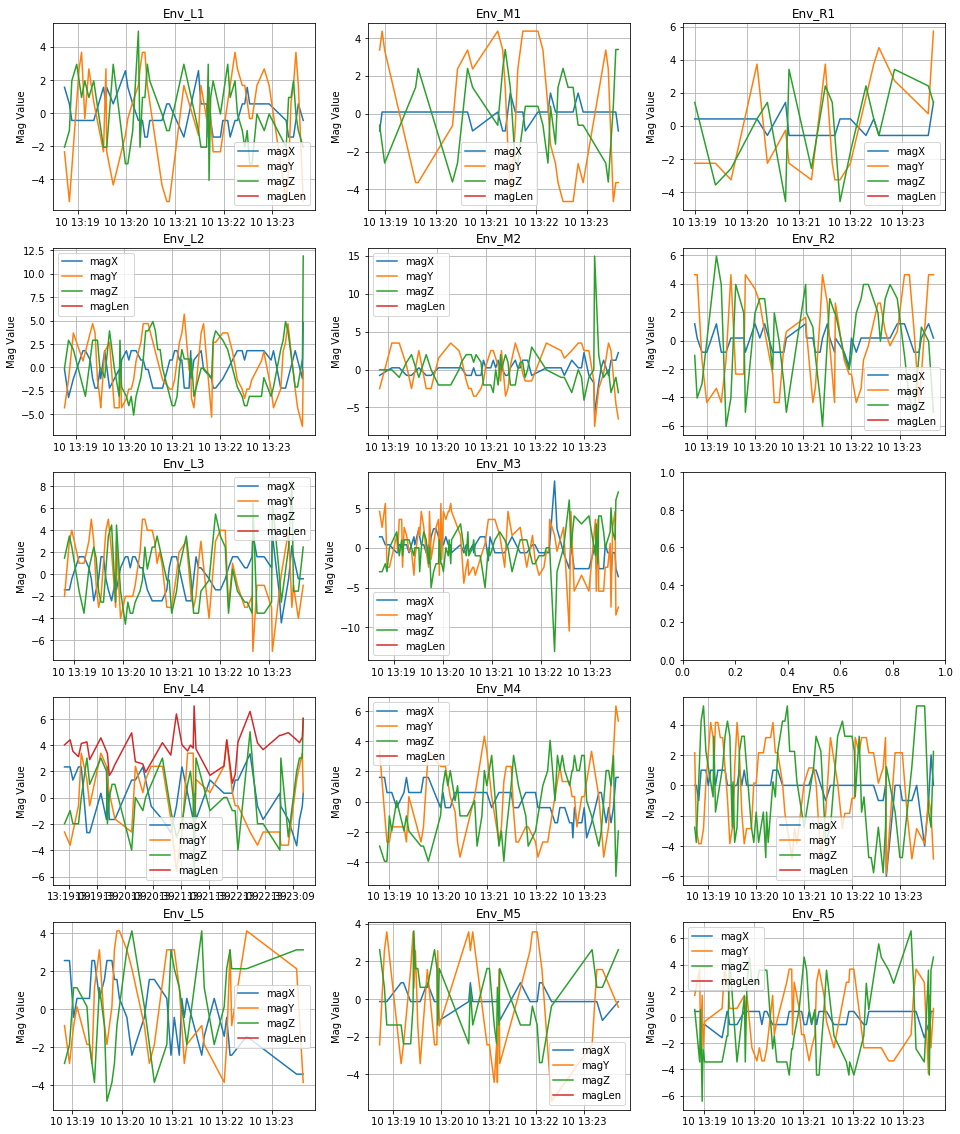

In [154]:
def fast_plot_line(figure, axis, index, time , x, y, z, length ,title, ylimit):
    indexRow = int(index/3)
    indexCol = int(index%3)
    axis[indexRow][indexCol].plot()
    axis[indexRow][indexCol].plot(time, x, label='magX')
    axis[indexRow][indexCol].plot(time, y, label='magY')
    axis[indexRow][indexCol].plot(time, z, label='magZ')
    axis[indexRow][indexCol].plot(time, length, label='magLen')
#     axis[index][0].set_xlabel('Time')
    axis[indexRow][indexCol].set_ylabel('Mag Value')
    axis[indexRow][indexCol].set_title(title)
    axis[indexRow][indexCol].legend()
    axis[indexRow][indexCol].grid()
    if ylimit:
        axis[index].set_ylim([-100, 100])
    return None

def plot_basic_plot(count, magX, magY, magZ, title):
    plt.figure()
    plt.plot(count, magX, label='magX')
    plt.plot(count, magY, label='magY')
    plt.plot(count, magZ, label='magZ')
    plt.xlabel('Time')
    plt.ylabel('Mag Value')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def get_secific_time_data(data, ex_start_time, ex_end_time ,offset = 0):
    data = data.loc[df['timestamp'] >= ex_start_time ]
    data = data.loc[df['timestamp'] <= ex_end_time]
    data = data.drop_duplicates(['frameCnt'])
    return data

CarFolder = "/CAR_RV"
prseFolder = "/Env/"
folderNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + prseFolder

UTC_offset = 60*60*8
ex_start_time = 1502342523
ex_end_time = 1502342823


env_start_time = 1502342523 -200
env_end_time = 1502342823 -200
point = int(env_end_time - env_start_time)/3
f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
# f.tight_layout()

index = 0
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, env_start_time, env_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(point - dfenvlen)
        loserate = losepoint / point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            EnvMagX = dfenv.magX.mean()
            EnvMagY = dfenv.magY.mean()
            EnvMagZ = dfenv.magZ.mean()
            EnvMagLen = dfenv.mag_len.mean()
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            dfenv["magX_of"] = dfenv.magX - EnvMagX
            dfenv["magY_of"] = dfenv.magY - EnvMagY
            dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
            dfenv["magLen_of"] = (magX.pow(2) + magY.pow(2) + magZ.pow(2) ).pow(0.5)
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
                           dfenv["magLen_of"] , 'Env_' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
            check_file_path_exist(folderNmae + csv)
            dfenv.to_csv(folderNmae + csv)
        else:
            print(csv, " doesn't contain this time data")
    
    index += 1

# imageName = folderNmae + "Matrix.png"
# f.savefig(imageName ,bbox_inches='tight', dpi=200)

Node: L1  - data in this time: 54 data lose: 46  rate: 46.0
Node: M1  - data in this time: 33 data lose: 67  rate: 67.0
Node: R1  - data in this time: 19 data lose: 81  rate: 81.0
Node: L2  - data in this time: 68 data lose: 32  rate: 32.0
Node: M2  - data in this time: 53 data lose: 47  rate: 47.0
Node: R2  - data in this time: 48 data lose: 52  rate: 52.0
Node: L3  - data in this time: 66 data lose: 34  rate: 34.0
Node: M3  - data in this time: 84 data lose: 16  rate: 16.0
Node: L4  - data in this time: 43 data lose: 57  rate: 56.99999999999999
Node: M4  - data in this time: 66 data lose: 34  rate: 34.0
Node: R5  - data in this time: 80 data lose: 20  rate: 20.0
Node: L5  - data in this time: 37 data lose: 63  rate: 63.0
Node: M5  - data in this time: 37 data lose: 63  rate: 63.0
Node: R5  - data in this time: 61 data lose: 39  rate: 39.0


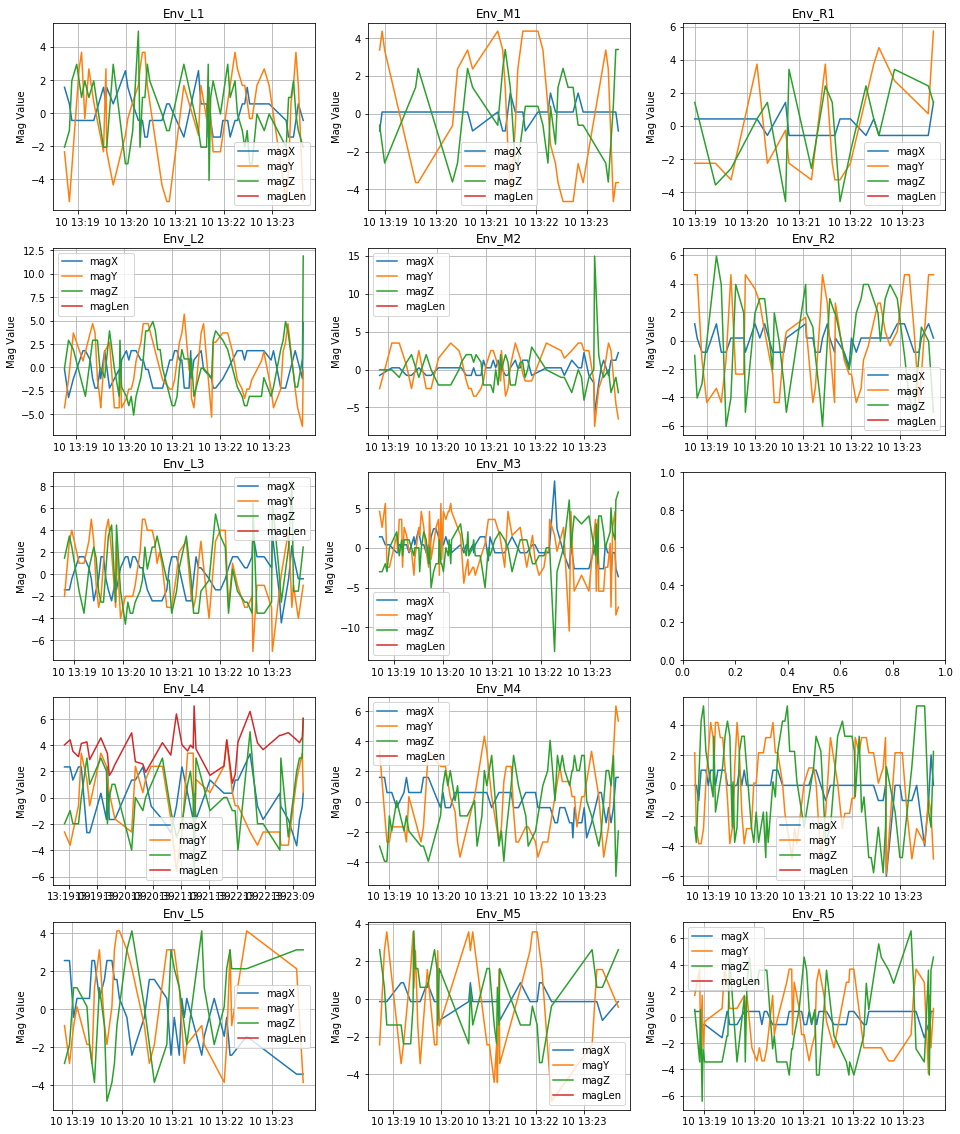

In [168]:
def fast_plot_line(figure, axis, index, time , x, y, z, length ,title, ylimit):
    indexRow = int(index/3)
    indexCol = int(index%3)
    axis[indexRow][indexCol].plot()
    axis[indexRow][indexCol].plot(time, x, label='magX')
    axis[indexRow][indexCol].plot(time, y, label='magY')
    axis[indexRow][indexCol].plot(time, z, label='magZ')
    axis[indexRow][indexCol].plot(time, length, label='magLen')
#     axis[index][0].set_xlabel('Time')
    axis[indexRow][indexCol].set_ylabel('Mag Value')
    axis[indexRow][indexCol].set_title(title)
    axis[indexRow][indexCol].legend()
    axis[indexRow][indexCol].grid()
    if ylimit:
        axis[index].set_ylim([-100, 100])
    return None

def plot_basic_plot(count, magX, magY, magZ, title):
    plt.figure()
    plt.plot(count, magX, label='magX')
    plt.plot(count, magY, label='magY')
    plt.plot(count, magZ, label='magZ')
    plt.xlabel('Time')
    plt.ylabel('Mag Value')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def get_secific_time_data(data, ex_start_time, ex_end_time ,offset = 0):
    data = data.loc[df['timestamp'] >= ex_start_time ]
    data = data.loc[df['timestamp'] <= ex_end_time]
    data = data.drop_duplicates(['frameCnt'])
    return data

CarFolder = "/CAR_RV"
prseFolder = "/Env/"
folderNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + prseFolder

UTC_offset = 60*60*8
ex_start_time = 1502342523
ex_end_time = 1502342823


env_start_time = 1502342523 -200
env_end_time = 1502342823 -200
point = int(env_end_time - env_start_time)/3
f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
# f.tight_layout()
Env_mag_array = list()

index = 0
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, env_start_time, env_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(point - dfenvlen)
        loserate = losepoint / point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            EnvMagX = dfenv.magX.mean()
            EnvMagY = dfenv.magY.mean()
            EnvMagZ = dfenv.magZ.mean()
            EnvMagLen = dfenv.mag_len.mean()
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            dfenv["magX_of"] = dfenv.magX - EnvMagX
            dfenv["magY_of"] = dfenv.magY - EnvMagY
            dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
            dfenv["magLen_of"] = (magX.pow(2) + magY.pow(2) + magZ.pow(2) ).pow(0.5)
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
                           dfenv["magLen_of"] , 'Env_' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
            check_file_path_exist(folderNmae + csv)
            dfenv.to_csv(folderNmae + csv)
            Env_mag_array.append([EnvMagX, EnvMagY ,EnvMagZ])
        else:
            print(csv, " doesn't contain this time data")
    else:
        Env_mag_array.append([0, 0 ,0])
    index += 1

# imageName = folderNmae + "Matrix.png"
# f.savefig(imageName ,bbox_inches='tight', dpi=200)

Node: L1  - data in this time: 17 data lose: 23  rate: 57.49999999999999
Node: M1  - data in this time: 18 data lose: 22  rate: 55.00000000000001
Node: R1  - data in this time: 18 data lose: 22  rate: 55.00000000000001
Node: L2  - data in this time: 31 data lose: 9  rate: 22.5
Node: M2  - data in this time: 16 data lose: 24  rate: 60.0
Node: R2  - data in this time: 25 data lose: 15  rate: 37.5
Node: L3  - data in this time: 25 data lose: 15  rate: 37.5
Node: M3  - data in this time: 30 data lose: 10  rate: 25.0
Node: L4  - data in this time: 14 data lose: 26  rate: 65.0
Node: M4  - data in this time: 22 data lose: 18  rate: 45.0
Node: R5  - data in this time: 27 data lose: 13  rate: 32.5
Node: L5  - data in this time: 9 data lose: 31  rate: 77.5
Node: M5  - data in this time: 22 data lose: 18  rate: 45.0
Node: R5  - data in this time: 21 data lose: 19  rate: 47.5
Node: L1  - data in this time: 17 data lose: 23  rate: 57.49999999999999
Node: M1  - data in this time: 18 data lose: 22  r

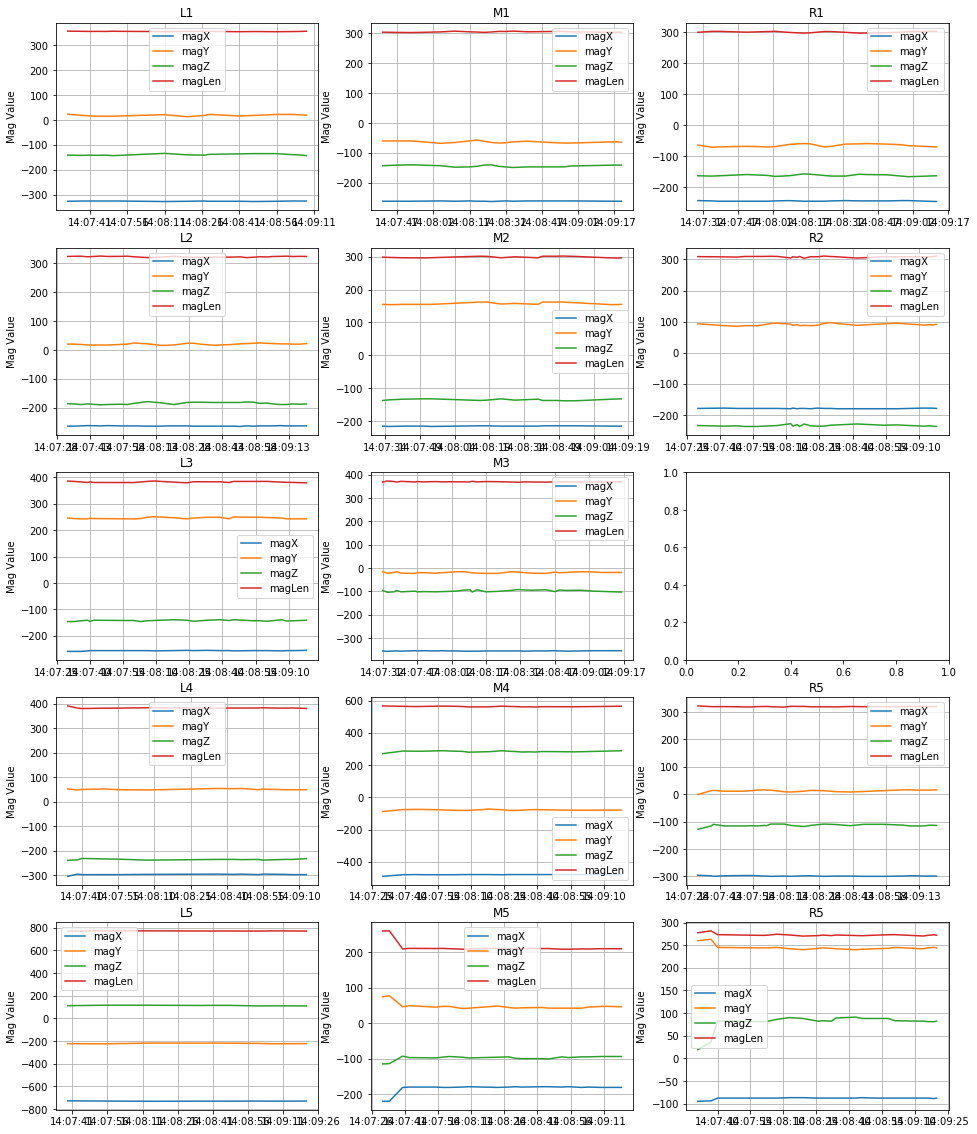

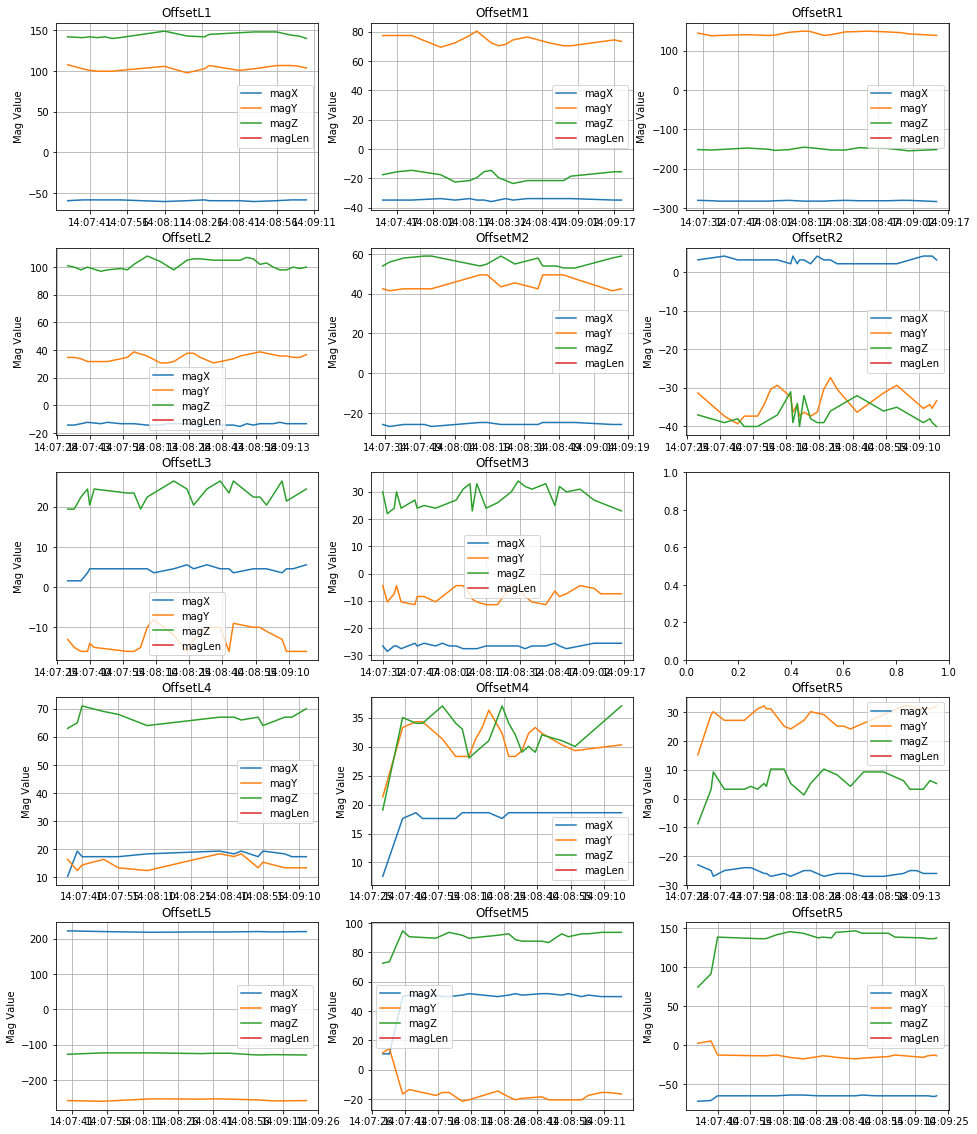

In [242]:
def fast_plot_line(figure, axis, index, time , x, y, z, length ,title, ylimit):
    indexRow = int(index/3)
    indexCol = int(index%3)
    axis[indexRow][indexCol].plot()
    axis[indexRow][indexCol].plot(time, x, label='magX')
    axis[indexRow][indexCol].plot(time, y, label='magY')
    axis[indexRow][indexCol].plot(time, z, label='magZ')
    axis[indexRow][indexCol].plot(time, length, label='magLen')
#     axis[index][0].set_xlabel('Time')
    axis[indexRow][indexCol].set_ylabel('Mag Value')
    axis[indexRow][indexCol].set_title(title)
    axis[indexRow][indexCol].legend()
    axis[indexRow][indexCol].grid()
    if ylimit:
        axis[index].set_ylim([-100, 100])
    return None

def plot_basic_plot(count, magX, magY, magZ, title):
    plt.figure()
    plt.plot(count, magX, label='magX')
    plt.plot(count, magY, label='magY')
    plt.plot(count, magZ, label='magZ')
    plt.xlabel('Time')
    plt.ylabel('Mag Value')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def get_secific_time_data(data, ex_start_time, ex_end_time ,offset = 0):
    data = data.loc[df['timestamp'] >= ex_start_time ]
    data = data.loc[df['timestamp'] <= ex_end_time]
    data = data.drop_duplicates(['frameCnt'])
    return data

CarFolder = "/CAR_RV"
# prseFolder = "/F1/"
# prseFolder = "/B1/"
# prseFolder = "/F2/"
# prseFolder = "/B2/"
prseFolder = "/R70/"
# prseFolder = "/R50/"
# prseFolder = "/R30/"
# prseFolder = "/Back70/"
# prseFolder = "/Back50/"
# prseFolder = "/Back0/"
# prseFolder = "/Front70/"
# prseFolder = "/Front50/"

EnvFolder = "/Env/"
folderName = os.getcwd() + '/0810_MatrixALL/'
folderEnvNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + EnvFolder
folderPraseNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + prseFolder

env_start_time = 1502343462
env_end_time = 1502343582
env_point = int(env_end_time - env_start_time)/3

# EnV	RV4	1502342323	1502342623
# F1	RV4	1502343083	1502343166
# B1	RV4	1502343166	1502343207
# F2	RV4	1502343207	1502343253
# B2	RV4	1502343253	1502343289
# R70	RV4	1502343462	1502343582
# R50	RV4	1502343665	1502343992
# R30	RV4	1502344008	1502344201
# Back70	RV4	1502344674	1502344800
# Back50	RV4	1502344800	1502345250
# Back0	RV4	1502345250	1502345361
# Front70	RV4	1502349488	1502349736
# Front50	RV4	1502349866	1502341166


UTC_offset = 60*60*8
ex_start_time = 1502345250
ex_end_time = 1502345361
ex_point = int(env_end_time - env_start_time)/3


f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
# f.tight_layout()


############## ENV value ################
# Env_mag_array = list()
# index = 0
# for csv in csvFiles:
# # df = pd.read_csv(folderName + csvFiles[0])
#     if(len(csv)):
#         df = pd.read_csv(folderName + csv)
#         dfenv = get_secific_time_data(df, env_start_time, env_end_time)
#         dfenvlen = len(dfenv)
#         losepoint = int(env_point - dfenvlen)
#         loserate = losepoint / env_point *100
#         print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
#         if (len(dfenv)):
#             EnvMagX = dfenv.magX.mean()
#             EnvMagY = dfenv.magY.mean()
#             EnvMagZ = dfenv.magZ.mean()
#             EnvMagLen = dfenv.mag_len.mean()
#             dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
#             dfenv["magX_of"] = dfenv.magX - EnvMagX
#             dfenv["magY_of"] = dfenv.magY - EnvMagY
#             dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
#             dfenv["magLen_of"] = (magX.pow(2) + magY.pow(2) + magZ.pow(2) ).pow(0.5)
#             fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
#                            dfenv["magLen_of"] , 'Env_' + MatrixID[index], ylimit = None)
#     #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
#             check_file_path_exist(folderNmae + csv)
#             dfenv.to_csv(folderEnvNmae + csv)
#             Env_mag_array.append([EnvMagX, EnvMagY ,EnvMagZ])
#         else:
#             print(csv, " doesn't contain this time data")
#     else:
#         Env_mag_array.append([0, 0 ,0])
#     index += 1
# imageName = folderEnvNmae + "Matrix.png"
# f.savefig(imageName ,bbox_inches='tight', dpi=200)

############# the other ####################  
# print(csv, " doesn't contain this time data")

index = 0
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, ex_start_time, ex_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(ex_point - dfenvlen)
        loserate = losepoint / ex_point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX"],  dfenv["magY"], dfenv["magZ"], 
                           dfenv["mag_len"] , '' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
#             check_file_path_exist(folderPraseNmae + csv)
#             dfenv.to_csv(folderPraseNmae + csv)
        else:
            print(csv, " doesn't contain this time data")
            
    index += 1    
    
imageName = folderPraseNmae + "Matrix.png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)





f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
index = 0
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, ex_start_time, ex_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(ex_point - dfenvlen)
        loserate = losepoint / ex_point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            EnvMagX = Env_mag_array[index][0]
            EnvMagY = Env_mag_array[index][1]
            EnvMagZ = Env_mag_array[index][2]
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            dfenv["magX_of"] = dfenv.magX - EnvMagX
            dfenv["magY_of"] = dfenv.magY - EnvMagY
            dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
            dfenv["magLen_of"] = (magX.pow(2) + magY.pow(2) + magZ.pow(2) ).pow(0.5)
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
                           dfenv["magLen_of"] , 'Offset' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
            check_file_path_exist(folderPraseNmae + csv)
            dfenv.to_csv(folderPraseNmae + csv)
        else:
            print(csv, " doesn't contain this time data")
            
    index += 1    
    
imageName = folderPraseNmae + "MatrixOffset.png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)

In [237]:
# f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
# index = 0
# for csv in csvFiles:
# # df = pd.read_csv(folderName + csvFiles[0])
#     if(len(csv)):
#         df = pd.read_csv(folderName + csv)
#         dfenv = get_secific_time_data(df, ex_start_time, ex_end_time)
#         dfenvlen = len(dfenv)
#         losepoint = int(ex_point - dfenvlen)
#         loserate = losepoint / ex_point *100
#         print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
#         if (len(dfenv)):
#             EnvMagX = Env_mag_array[index][0]
#             EnvMagY = Env_mag_array[index][1]
#             EnvMagZ = Env_mag_array[index][2]
#             dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
#             dfenv["magX_of"] = dfenv.magX - EnvMagX
#             dfenv["magY_of"] = dfenv.magY - EnvMagY
#             dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
#             dfenv["magLen_of"] = (magX.pow(2) + magY.pow(2) + magZ.pow(2) ).pow(0.5)
#             fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
#                            dfenv["magLen_of"] , 'Offset' + MatrixID[index], ylimit = None)
#     #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
#             check_file_path_exist(folderPraseNmae + csv)
#             dfenv.to_csv(folderPraseNmae + csv)
#         else:
#             print(csv, " doesn't contain this time data")
            
#     index += 1    
    
# imageName = folderPraseNmae + "MatrixOffset.png"
# f.savefig(imageName ,bbox_inches='tight', dpi=200)

In [174]:
Env_mag_array

[[-266.55555555555554, -84.66666666666667, -282.94444444444446],
 [-227.0909090909091, -137.36363636363637, -125.39393939393939],
 [37.578947368421055, -208.73684210526315, -11.421052631578947],
 [-249.77941176470588, -14.676470588235293, -286.8970588235294],
 [-189.22641509433961, 112.50943396226415, -190.96226415094338],
 [-182.1875, 124.35416666666667, -196.95833333333334],
 [-260.57575757575756, 259.0151515151515, -165.45454545454547],
 [-328.3809523809524, -11.55952380952381, -126.0],
 [0, 0, 0],
 [-314.3488372093023, 35.604651162790695, -302.0232558139535],
 [-497.6060606060606, -109.33333333333333, 251.93939393939394],
 [-273.0, -16.15, -119.2375],
 [-950.5675675675676, 34.86486486486486, 238.86486486486487],
 [-230.86486486486487, 62.432432432432435, -187.6216216216216],
 [-23.42622950819672, 257.344262295082, -55.57377049180328]]